In [1]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv('../../files-dataframes/owid-covid-data.csv')
df = pd.DataFrame(csv)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.79,1.7,61.49,0.57,16320539,NaN,NaN,NaN,NaN


## Como foi a evolução mundial da COVID-19?


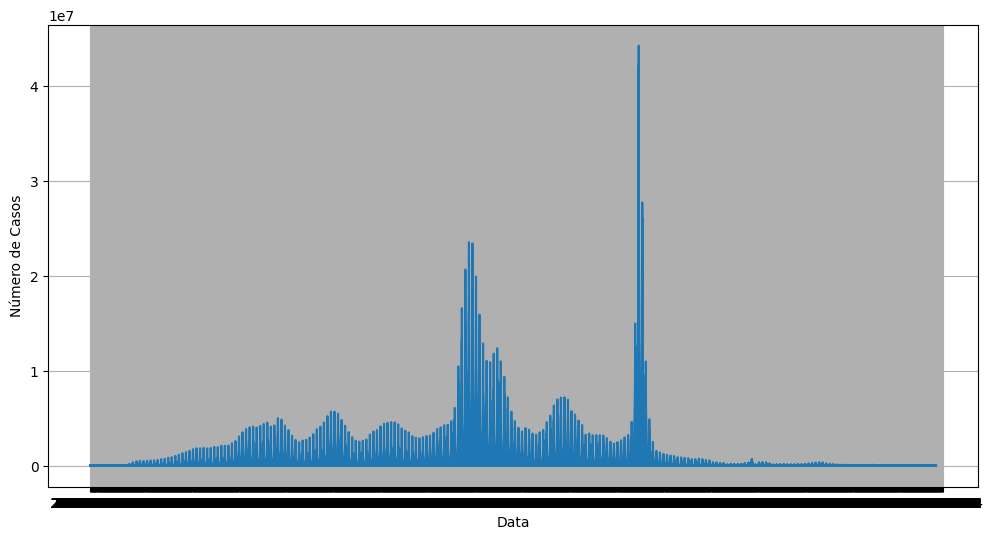

In [2]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['new_cases'], label='Casos diários')
plt.xlabel('Data')
plt.ylabel('Número de Casos')
plt.grid(True)
plt.show()

In [3]:
# A evolução mundial da covid-19 é representada neste gráfico com picos de contagio durante alguns periodos

## Quais são os 5 países com mais casos e mortes acumulados?

In [34]:
df = df.drop(df[df['location'] == 'World'].index)
df = df.drop(df[df['location'] == ''].index)
df = df.drop(df[df['total_deaths'] == ''].index)
df = df.dropna(subset=['total_deaths'])
df = df.drop(df[df['location'] == 'High-income countries'].index)
df = df.drop(df[df['location'] == 'Upper-middle-income countries'].index)
df = df.drop(df[df['location'] == 'Europe'].index)
df = df.drop(df[df['location'] == 'North America'].index)
df = df.drop(df[df['location'] == 'Asia'].index)
df = df.drop(df[df['location'] == 'South America'].index)
df = df.drop(df[df['location'] == 'European Union (27)'].index)
df = df.drop(df[df['location'] == 'Lower-middle-income countries'].index)

In [35]:
df_unique_countries = df.loc[df.groupby('location')['total_deaths'].idxmax()]
df_sorted = df_unique_countries.sort_values(by='total_deaths', ascending=False)
top_5_countries = df_sorted.head(5)
print(top_5_countries[['location', 'total_deaths']])

             location  total_deaths
405124  United States     1193165.0
51459          Brazil      702116.0
175208          India      533623.0
317756         Russia      403188.0
245364         Mexico      334551.0


## Quais são os 5 países mais avançados em relação à vacinação da população?